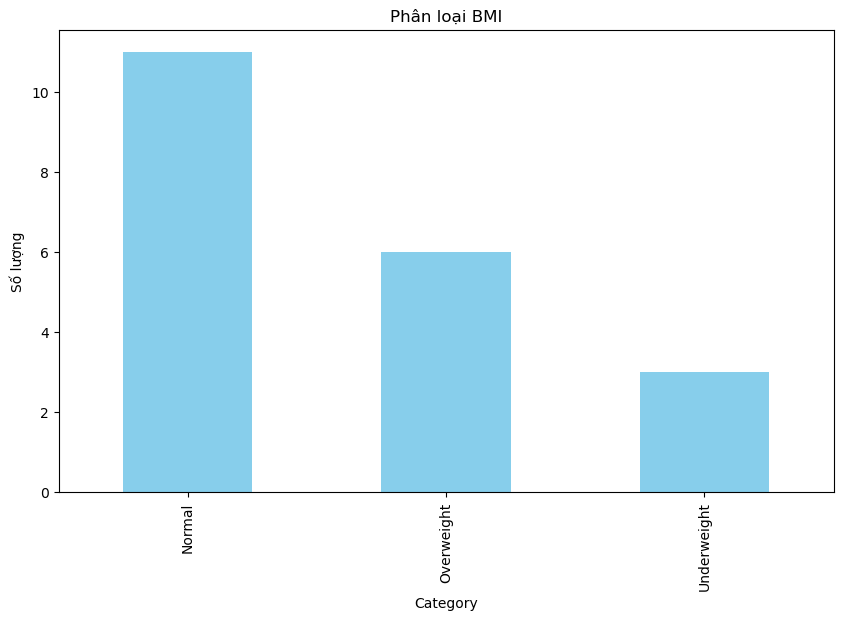

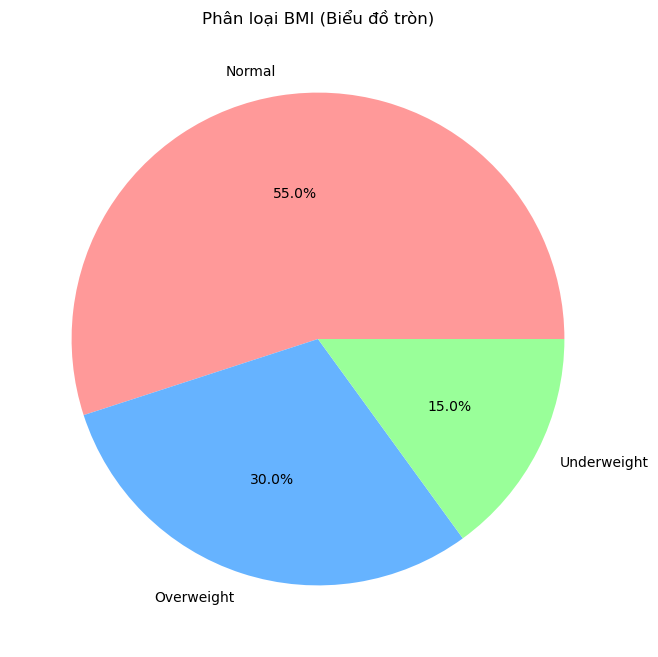

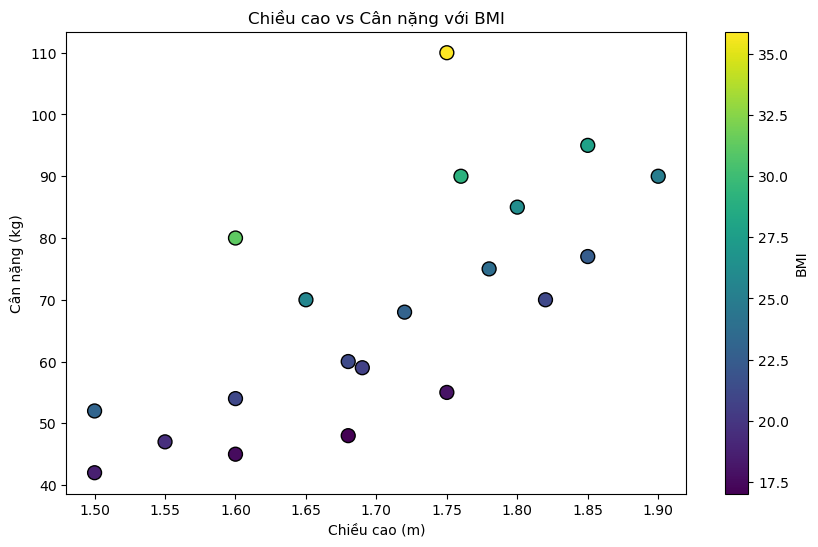

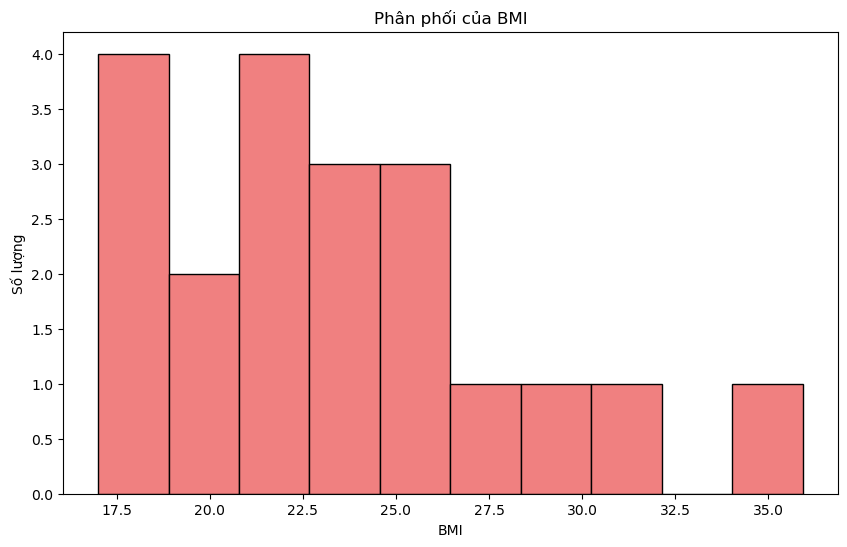

<Figure size 800x600 with 0 Axes>

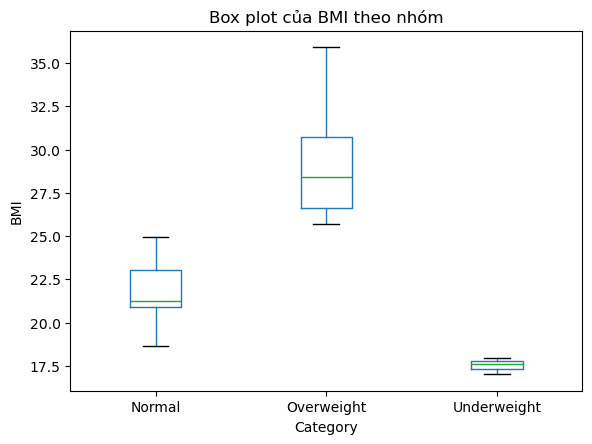

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('data.csv')

# Tính toán chỉ số BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Phân loại theo nhóm underweight, normal, overweight
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    else:
        return 'Overweight'

df['Category'] = df['BMI'].apply(classify_bmi)

# Hiển thị 5 dạng biểu đồ phân loại

# 1. Biểu đồ cột phân loại BMI
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân loại BMI')
plt.xlabel('Category')
plt.ylabel('Số lượng')
plt.show()

# 2. Biểu đồ tròn phân loại BMI
plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Phân loại BMI (Biểu đồ tròn)')
plt.ylabel('')
plt.show()

# 3. Biểu đồ phân tán (scatter plot) BMI
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], c=df['BMI'], cmap='viridis', edgecolor='black', s=100)
plt.title('Chiều cao vs Cân nặng với BMI')
plt.xlabel('Chiều cao (m)')
plt.ylabel('Cân nặng (kg)')
plt.colorbar(label='BMI')
plt.show()

# 4. Biểu đồ histogram của BMI
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Phân phối của BMI')
plt.xlabel('BMI')
plt.ylabel('Số lượng')
plt.show()

# 5. Biểu đồ hộp (box plot) của BMI
plt.figure(figsize=(8, 6))
df.boxplot(column='BMI', by='Category', grid=False)
plt.title('Box plot của BMI theo nhóm')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('BMI')
plt.show()


Mean Absolute Error (MAE): 0.45081352892689114
Mean Squared Error (MSE): 0.24463433775102136
Mean Absolute Percentage Error (MAPE): 1.9530194300422503%


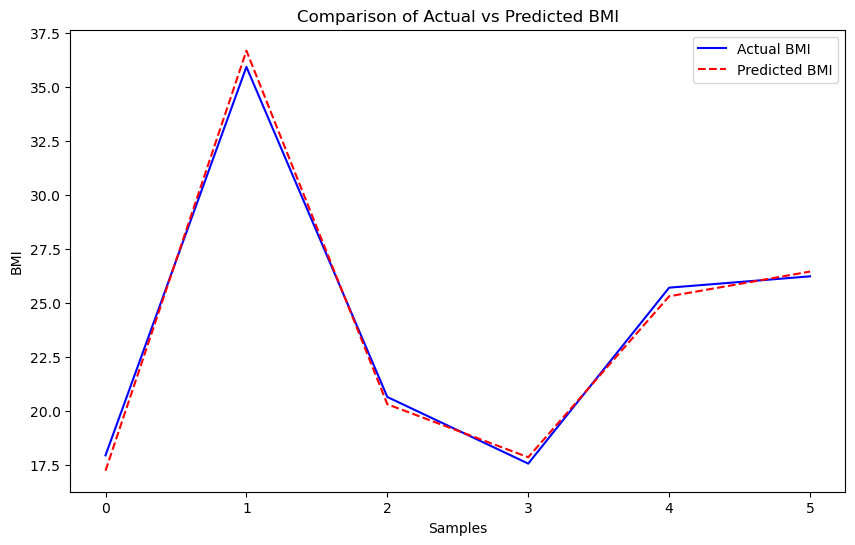

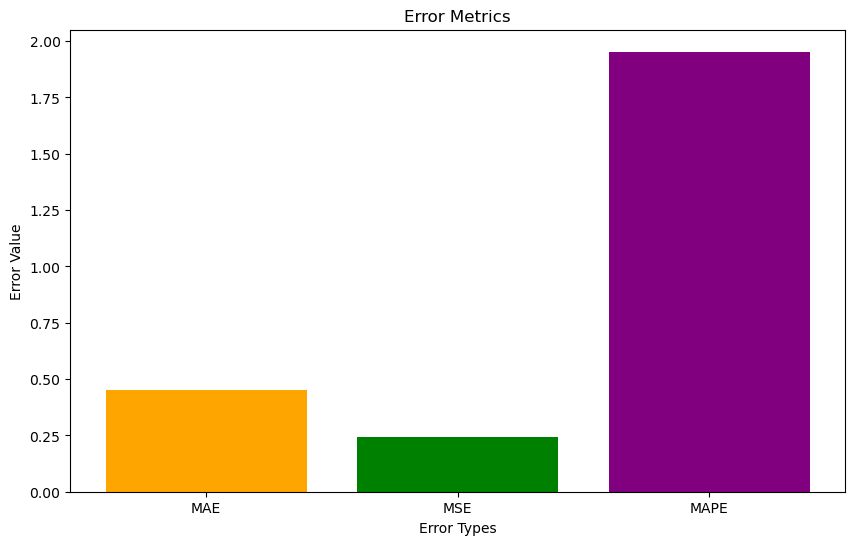

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ file CSV
df = pd.read_csv('data.csv')

# Tính toán chỉ số BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Phân loại theo nhóm underweight, normal, overweight
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    else:
        return 'Overweight'

df['Category'] = df['BMI'].apply(classify_bmi)

# Chuẩn bị dữ liệu đầu vào (BMI) và nhãn (Cân nặng)
X = df[['Height', 'Weight']]
y = df['BMI']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MSE
mse = mean_squared_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Hiển thị các chỉ số sai số
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))

# Biểu đồ đường cho giá trị thực tế
plt.plot(y_test.values, label='Actual BMI', color='blue')

# Biểu đồ đường cho giá trị dự đoán
plt.plot(y_pred, label='Predicted BMI', color='red', linestyle='--')

# Tạo tiêu đề và nhãn
plt.title('Comparison of Actual vs Predicted BMI')
plt.xlabel('Samples')
plt.ylabel('BMI')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Vẽ biểu đồ các sai số
errors = {
    'MAE': mae,
    'MSE': mse,
    'MAPE': mape
}

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột
plt.bar(errors.keys(), errors.values(), color=['orange', 'green', 'purple'])

# Tạo tiêu đề và nhãn
plt.title('Error Metrics')
plt.xlabel('Error Types')
plt.ylabel('Error Value')

# Hiển thị biểu đồ
plt.show()
